# Problem Statement

### Suppose that you are working as a data analyst at Airbnb. For the past few months, Airbnb has seen a major decline in revenue. Now that the restrictions have started lifting and people have started to travel more, Airbnb wants to make sure that it is fully prepared for this change.

### The different leaders at Airbnb want to understand some important insights based on various attributes in the dataset so as to increase the revenue such as -

### Which type of hosts to acquire more and where?
### The categorisation of customers based on their preferences.
### What are the neighbourhoods they need to target?
### What is the pricing ranges preferred by customers?
### The various kinds of properties that exist w.r.t. customer preferences.
### Adjustments in the existing properties to make it more customer-oriented.
### What are the most popular localities and properties in New York currently?
### How to get unpopular properties more traction? and so on...

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('E:\#Upgrad\#Data Analytics Specialis\Data Storytelling\Air BNB Case Study\AB_NYC_2019.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,5/7/2019,464,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,10,1,0


In [5]:
df.shape

(48895, 16)

In [6]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Name Column

In [ ]:
# We Observ the name column has missing values. Imputing missing names as not specified. 

In [11]:
df[df["name"].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [8]:
df['name'] = df['name'].fillna('No_Specified')

In [9]:
df.name.isnull().sum()

0

In [12]:
df.name.value_counts(dropna=False)

name
Hillside Hotel                                        18
Home away from home                                   17
No Name                                               16
New york Multi-unit building                          16
Brooklyn Apartment                                    12
                                                      ..
Brownstone garden 2 bedroom duplex, Central Park       1
Bright Cozy Private Room near Columbia Univ            1
1 bdrm/large studio in a great location                1
Cozy Private Room #2 Two Beds Near JFK and J Train     1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: count, Length: 47897, dtype: int64

### Host_Name Column

In [15]:
df.host_name.isnull().sum()

21

In [16]:
# We observe there missing Host_name in the column. Imputing the missing value as Not_Specified.

In [17]:
df.host_name = df.host_name.fillna('Not_Specified')

In [18]:
df.host_name.isnull().sum()

0

### neighbourhood_group Column

In [19]:
df.neighbourhood_group.value_counts(dropna=False)

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [20]:
df.neighbourhood_group.isnull().sum()

0

In [23]:
len(df["neighbourhood_group"].unique())

5

### neighbourhood column

In [21]:
df.neighbourhood.value_counts(dropna=False)

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [22]:
len(df["neighbourhood"].unique())

221

In [24]:
df.groupby(['neighbourhood']).size().value_counts()

4       8
7       8
2       7
8       7
11      6
       ..
744     1
29      1
237     1
1853    1
235     1
Name: count, Length: 124, dtype: int64

In [25]:
df[['neighbourhood','price']].value_counts(dropna=False)

neighbourhood       price
Bushwick            50       201
Bedford-Stuyvesant  50       183
                    60       181
Williamsburg        100      174
                    60       166
                            ... 
Greenwich Village   1100       1
                    1099       1
                    999        1
                    800        1
Woodside            500        1
Name: count, Length: 11163, dtype: int64

In [26]:
df.groupby('neighbourhood')['price'].nunique()

neighbourhood
Allerton            29
Arden Heights        4
Arrochar            17
Arverne             42
Astoria            135
                  ... 
Windsor Terrace     73
Woodhaven           41
Woodlawn            10
Woodrow              1
Woodside            78
Name: price, Length: 221, dtype: int64

### room_type column

In [27]:
df.room_type.value_counts(dropna=False)

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

### Price Column

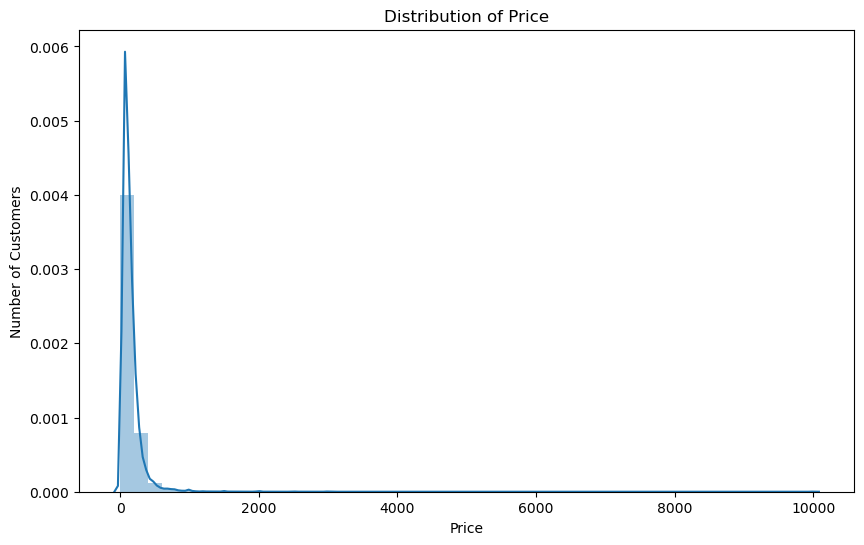

In [28]:
# Distribution of price
plt.figure(figsize=(10,6))
sns.distplot(df['price'])
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Number of Customers')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

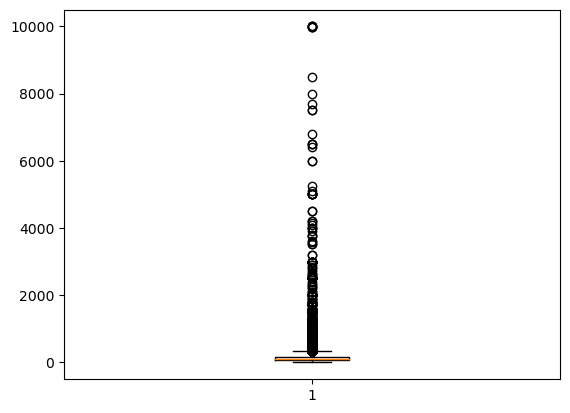

In [29]:
plt.boxplot(df.price)
plt.show

## We can observe in the above Histogram chart and box plot. There are outliers in the Price column which is affecting the statiistical calculation. most of the customers are opting for service winthin price range of 0 to 2000. We can drop the rows above 2000. 

In [30]:
# Droping rows
df = df[df['price'] <= 2000]

In [32]:
df.shape

(48809, 16)

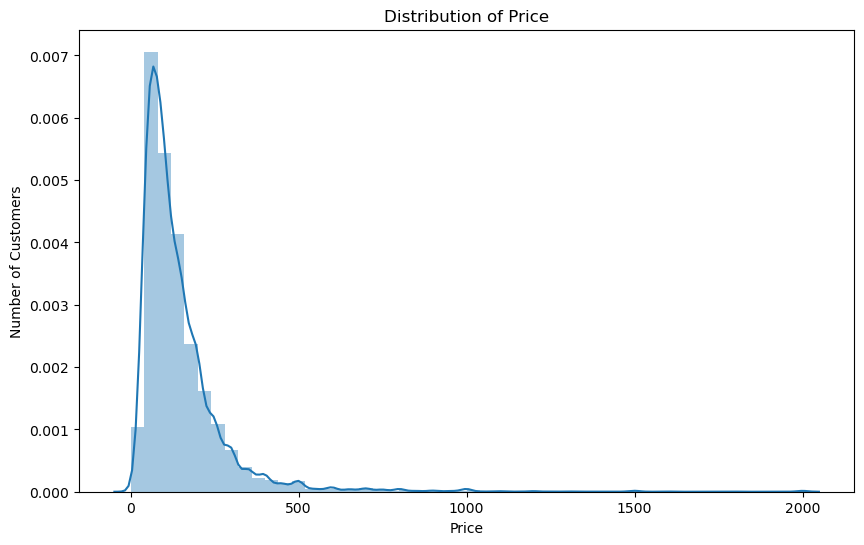

In [31]:
# Distribution of price
plt.figure(figsize=(10,6))
sns.distplot(df['price'])
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Number of Customers')
plt.show()

In [33]:
# We can further romve more rows for better visuals.
df = df[df['price'] <= 1000]

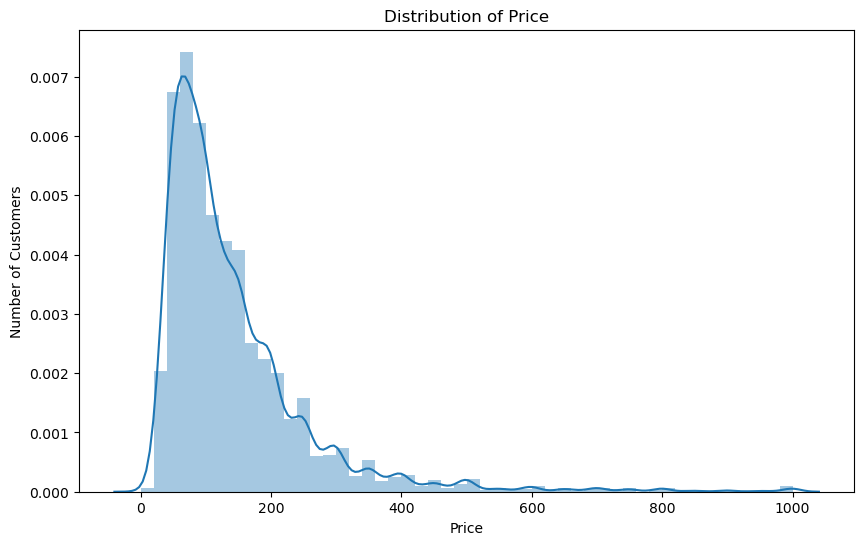

In [34]:
# Distribution of price
plt.figure(figsize=(10,6))
sns.distplot(df['price'])
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Number of Customers')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

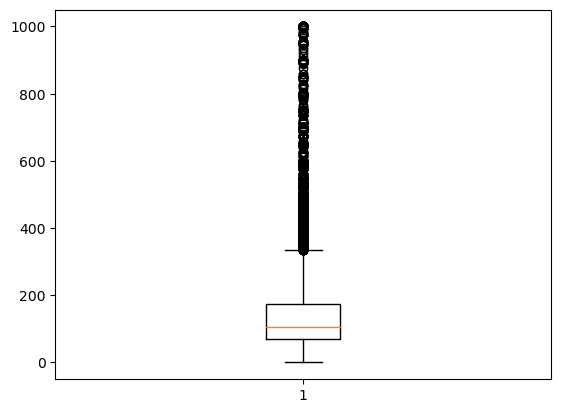

In [35]:
plt.boxplot(df.price)
plt.show

In [37]:
df['price'].quantile([0.25,0.50,0.75,1])

0.25      69.0
0.50     105.0
0.75     175.0
1.00    1000.0
Name: price, dtype: float64

### minimum_nights column

In [38]:
df.minimum_nights.value_counts(dropna=False)

minimum_nights
1      12620
2      11670
3       7978
30      3732
4       3296
       ...  
186        1
366        1
68         1
99         1
36         1
Name: count, Length: 108, dtype: int64

In [40]:
df.groupby('neighbourhood')['minimum_nights'].nunique()

neighbourhood
Allerton            6
Arden Heights       4
Arrochar            5
Arverne             4
Astoria            29
                   ..
Windsor Terrace    16
Woodhaven           7
Woodlawn            2
Woodrow             1
Woodside           13
Name: minimum_nights, Length: 221, dtype: int64

In [42]:
df.groupby('room_type')['minimum_nights'].nunique()

room_type
Entire home/apt    91
Private room       71
Shared room        29
Name: minimum_nights, dtype: int64

### number_of_reviews column

In [44]:
df.number_of_reviews.value_counts(dropna=False)

number_of_reviews
0      9920
1      5223
2      3452
3      2514
4      1987
       ... 
313       1
540       1
480       1
326       1
341       1
Name: count, Length: 394, dtype: int64

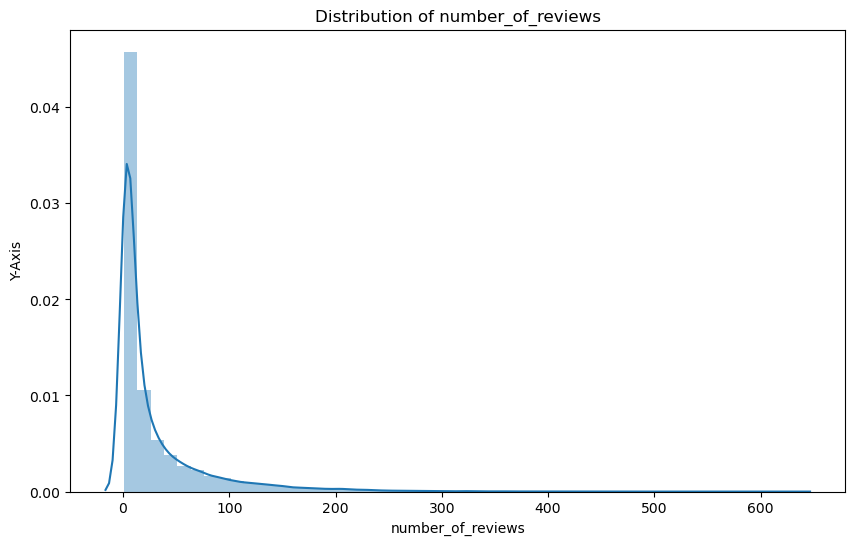

In [80]:
# Distribution of price
plt.figure(figsize=(10,6))
sns.distplot(df['number_of_reviews'])
plt.title('Distribution of number_of_reviews')
plt.xlabel('number_of_reviews')
plt.ylabel('Y-Axis')
plt.show()

### last_review column

In [47]:
df.last_review.value_counts(dropna=False)

last_review
NaN           9920
23-06-2019    1412
1/7/2019      1356
30-06-2019    1337
24-06-2019     872
              ... 
13-06-2014       1
22-04-2015       1
1/5/2015         1
15-07-2014       1
29-03-2018       1
Name: count, Length: 1763, dtype: int64

In [48]:
df.last_review.isnull().sum()

9920

In [49]:
df.last_review.head(20)

0     19-10-2018
1     21-05-2019
2            NaN
3       5/7/2019
4     19-11-2018
5     22-06-2019
6      5/10/2017
7     24-06-2019
8     21-07-2017
9       9/6/2019
10    22-06-2019
11    23-06-2019
12    24-06-2019
13      5/7/2019
14    31-10-2018
15    29-06-2019
16    28-06-2019
17      1/7/2019
18    22-06-2019
19           NaN
Name: last_review, dtype: object

In [ ]:
## We can observ the data formate in of two kind. 

In [50]:
df['last_review'] = df['last_review'].str.replace('/', '-')

In [51]:
# Type casting from Object to data type
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce', format='%d-%m-%Y')

In [54]:
df.last_review.dtype

dtype('<M8[ns]')

In [63]:
df.last_review.isnull().sum()

0

In [56]:
df.last_review.info()

<class 'pandas.core.series.Series'>
Index: 48656 entries, 0 to 48894
Series name: last_review
Non-Null Count  Dtype         
--------------  -----         
38736 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 760.2 KB


In [57]:
df.last_review.head(10)

0   2018-10-19
1   2019-05-21
2          NaT
3   2019-07-05
4   2018-11-19
5   2019-06-22
6   2017-10-05
7   2019-06-24
8   2017-07-21
9   2019-06-09
Name: last_review, dtype: datetime64[ns]

### We can observe that last_review column has 9920 missing date. This could be the effect of covid. The service is temorarly shutdown or the data is not filled. We can use a technique to impute the missing dates in the column with date not avalable winthin that column and we can analyse that data further. 

In [ ]:
# Imputing the null values in the last_review column with the data 12-12-2012. This date is not available in the column. 

In [62]:
df.last_review = df.last_review.fillna('12-12-1912')

In [64]:
df.last_review.isnull().sum()

0

In [65]:
df.last_review.head(50)

0    2018-10-19
1    2019-05-21
2    2012-12-12
3    2019-07-05
4    2018-11-19
5    2019-06-22
6    2017-10-05
7    2019-06-24
8    2017-07-21
9    2019-06-09
10   2019-06-22
11   2019-06-23
12   2019-06-24
13   2019-07-05
14   2018-10-31
15   2019-06-29
16   2019-06-28
17   2019-07-01
18   2019-06-22
19   2012-12-12
20   2011-12-28
21   2019-07-01
22   2019-01-01
23   2019-07-02
24   2019-06-19
25   2019-06-23
26   2012-12-12
27   2017-08-13
28   2019-06-15
29   2019-04-19
30   2019-06-01
31   2019-06-14
32   2019-06-15
33   2019-07-01
34   2019-05-12
35   2019-06-21
36   2012-12-12
37   2019-06-22
38   2012-12-12
39   2019-07-05
40   2019-06-21
41   2019-05-27
42   2018-09-30
43   2019-06-16
44   2019-06-13
45   2019-06-05
46   2019-07-01
47   2019-05-25
48   2017-01-01
49   2019-06-17
Name: last_review, dtype: datetime64[ns]

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48656 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48656 non-null  int64         
 1   name                            48656 non-null  object        
 2   host_id                         48656 non-null  int64         
 3   host_name                       48656 non-null  object        
 4   neighbourhood_group             48656 non-null  object        
 5   neighbourhood                   48656 non-null  object        
 6   latitude                        48656 non-null  float64       
 7   longitude                       48656 non-null  float64       
 8   room_type                       48656 non-null  object        
 9   price                           48656 non-null  int64         
 10  minimum_nights                  48656 non-null  int64         
 11  number_

In [69]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [72]:
df.reviews_per_month.value_counts(dropna=False)

reviews_per_month
0       9920
2        917
5        891
100      887
3        801
        ... 
953        1
974        1
606        1
825        1
1054       1
Name: count, Length: 938, dtype: int64

In [ ]:
# We can observ that there 9920 0 reviews for the date we have imputed 12-12-2012.

In [73]:
df.number_of_reviews.value_counts(dropna=False)

number_of_reviews
0      9920
1      5223
2      3452
3      2514
4      1987
       ... 
313       1
540       1
480       1
326       1
341       1
Name: count, Length: 394, dtype: int64

### Droping the imputed date 12-12-1912

In [76]:
df = df[df['last_review'] != '12-12-1912']

In [77]:
df.shape

(38735, 16)

In [78]:
df.reviews_per_month.value_counts(dropna=False)

reviews_per_month
2       917
5       891
100     887
3       801
16      662
       ... 
953       1
974       1
606       1
825       1
1054      1
Name: count, Length: 937, dtype: int64

### reviews_per_month column

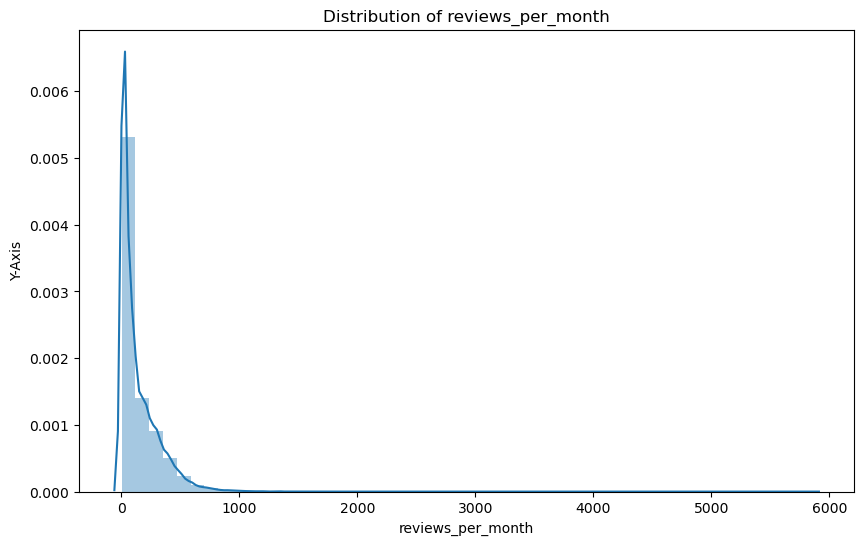

In [81]:
# Distribution of reviews_per_month
plt.figure(figsize=(10,6))
sns.distplot(df['reviews_per_month'])
plt.title('Distribution of reviews_per_month')
plt.xlabel('reviews_per_month')
plt.ylabel('Y-Axis')
plt.show()

### calculated_host_listings_count

In [82]:
df.calculated_host_listings_count.value_counts(dropna=False)

calculated_host_listings_count
1      25280
2       5743
3       2494
4       1280
5        734
6        473
7        318
8        317
327      207
9        187
10       148
12       138
13       106
52        91
96        90
11        87
91        79
34        67
17        60
15        56
31        55
103       51
47        46
33        45
121       43
49        41
50        40
87        39
39        39
28        39
232       28
30        28
14        28
29        28
25        26
20        25
18        24
43        22
26        22
23        21
21        19
19        19
16        16
37        13
27        12
32        10
65         1
Name: count, dtype: int64

In [84]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,464,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,59,1,129


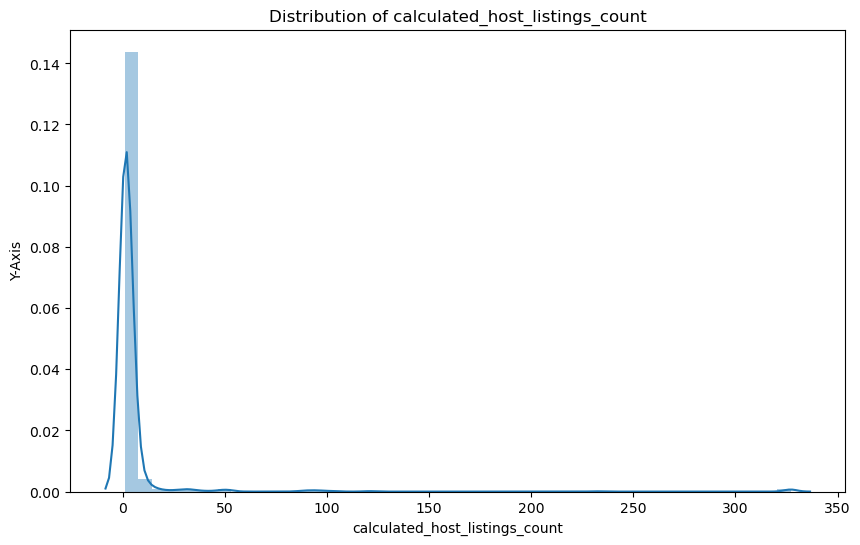

In [85]:
# Distribution of reviews_per_month
plt.figure(figsize=(10,6))
sns.distplot(df['calculated_host_listings_count'])
plt.title('Distribution of calculated_host_listings_count')
plt.xlabel('calculated_host_listings_count')
plt.ylabel('Y-Axis')
plt.show()

In [86]:
df['calculated_host_listings_count'].quantile([0.25,0.50,0.75,1])

0.25      1.0
0.50      1.0
0.75      2.0
1.00    327.0
Name: calculated_host_listings_count, dtype: float64

### availability_365 column

In [90]:
df.availability_365.value_counts(dropna=False)

availability_365
0      12668
365      824
1        367
364      295
5        291
       ...  
214       23
183       23
196       21
181       20
202       19
Name: count, Length: 366, dtype: int64

In [91]:
df.groupby('room_type')['availability_365'].nunique()

room_type
Entire home/apt    366
Private room       366
Shared room        217
Name: availability_365, dtype: int64

### latitude column

In [93]:
df.latitude.value_counts()

latitude
40.71813    15
40.69414    11
40.71353    11
40.68634    11
40.71947    10
            ..
40.80534     1
40.80191     1
40.88444     1
40.80933     1
40.80787     1
Name: count, Length: 17422, dtype: int64

In [94]:
### longitude column

In [95]:
df.longitude.value_counts()

longitude
-73.95427    16
-73.95677    16
-73.95405    15
-73.95742    14
-73.95551    14
             ..
-73.93130     1
-73.86575     1
-74.00657     1
-73.85636     1
-74.14275     1
Name: count, Length: 13630, dtype: int64

### Exporting the cleaned data set to local

In [ ]:
df= df.to_csv("E:\#Upgrad\#Data Analytics Specialis\Data Storytelling\Air BNB Case Study\AirBNB_Cleaned.csv", index=False)                 